# Gemma Qin - 43726
Date: 01.12.2023 <br>
Final test - Statistics <br>
Metropolia University of Applied Sciences

In [1]:
# Import necessary libraries
# Basics:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For the linear regression:
import seaborn as sns
from numpy import polyfit, polyval
from scipy.stats import linregress
from scipy.optimize import curve_fit

# For the randoms:
from numpy.random import default_rng
from numpy import random as rnd  
import numpy.random as rng

## Problem 1

In [2]:
# (a) Descriptive statistics
signal_speed = pd.read_csv('data29444.csv')
signal_speed.describe() 

,x
count,30.000000
mean,200.993000
std,1.370739
min,198.000000
25%,200.265000
50%,200.900000
75%,201.900000
max,203.480000


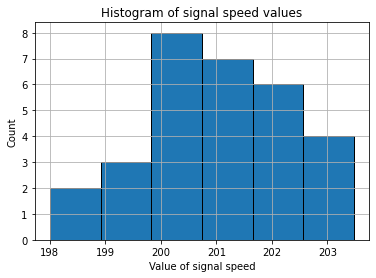

In [3]:
# (b) Histogram
plt.hist(signal_speed, bins = 6, edgecolor = 'black') # bins: calculated with square root data points then upround
plt.xlabel('Value of signal speed')
plt.ylabel('Count')
plt.title('Histogram of signal speed values')
plt.grid()
plt.show()

In [4]:
# (e) Values between 198.0 and 202.0
count = np.logical_and(signal_speed > 198.0, signal_speed < 202.0).sum()
count

x    22
dtype: int64

**Answers:** <br>
(c) mean = 200.99 <br>
(d) standard deviation = 1.37 <br>
(e) The number of data points between 198.0 and 202.0 is: 22. <br>

## Problem 2

In [5]:
# Importing data
dynamo_data = pd.read_csv('emg3087.csv')
force = dynamo_data['force']
emg = dynamo_data['emg']
dynamo_data.describe() 

,force,emg
count,7500.000000,7500.000000
mean,22.906514,0.133454
std,4.862645,0.037236
min,13.063622,0.063964
25%,18.940435,0.101667
50%,22.811808,0.131925
75%,26.770374,0.164633
max,31.949643,0.218078


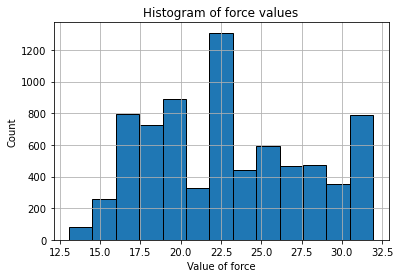

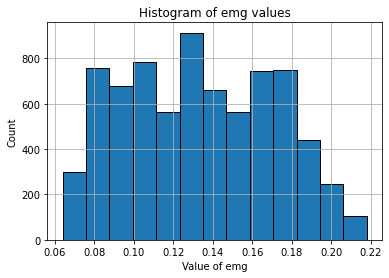

In [6]:
# (a) Histograms
# histogram of force: 
plt.hist(force, bins = 13, edgecolor = 'black') # bins: calc. based on  Sturges rule and adjusted
plt.xlabel('Value of force')
plt.ylabel('Count')
plt.title('Histogram of force values')
plt.grid()
plt.show()

# histogram of emg: 
plt.hist(emg, bins = 13, edgecolor = 'black') # bins: calc. based on  Sturges rule and adjusted
plt.xlabel('Value of emg')
plt.ylabel('Count')
plt.title('Histogram of emg values')
plt.grid()
plt.show()

In [7]:
# (c) Correlation
correlation = dynamo_data[['force', 'emg']].corr();
correlation

,force,emg
force,1.000000,0.811805
emg,0.811805,1.000000


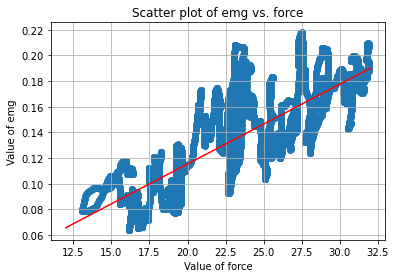

In [8]:
# (b) and (d) Scattergram and best fitting linear regression
# linear regression:
p = polyfit(force, emg, 1)
x1 = np.arange(12, 33)
y1 = p[0] * x1 + p[1]

# plotting:
plt.scatter(force, emg)
plt.plot(x1, y1, 'r')  
plt.title('Scatter plot of emg vs. force')
plt.xlabel('Value of force')
plt.ylabel('Value of emg')
plt.grid()
plt.show()

**Interpretation:**<br>

* (e) Based on the numeric value of the correlation and the scatter plot, there is strong correlation between force and emg. However, the emg associated with respective force may show a wide range of difference at certain data points, such as force = 22.5. <br>

## Problem 3

count    5000.000000
mean        5.706648
std         5.705138
min         0.000144
25%         1.660591
50%         3.915472
75%         7.927415
max        53.425179
dtype: float64


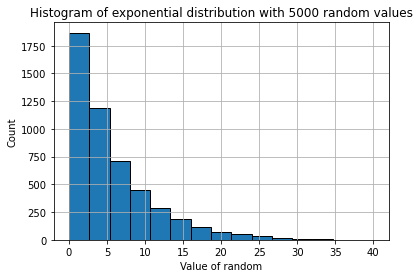

In [9]:
# My code
# generate:
rng = rnd.default_rng(11223)
scale = 5.6
size = 5000
x = rng.exponential(scale, size)

# histogram:
plt.hist(x, bins = np.linspace(0, 40, 16), edgecolor = 'black') 
plt.grid()
plt.xlabel('Value of random')
plt.ylabel('Count')
plt.title('Histogram of exponential distribution with 5000 random values')

# description:
df = pd.Series(x).describe()
print(df)

In [10]:
# My code
# mean:
mean =  5.706648

# less than mean:
less_than_mean = (x < mean).sum()
prop_less_than_mean = less_than_mean/ 5000
print(f'Number less than mean: {less_than_mean}, as proportion: {prop_less_than_mean:.2f}')

# between 1.61 - 7.76:
between = np.logical_and(x > 1.61, x < 7.76).sum()
prop_between = between / 5000
print(f'Number between 1.61 - 7.76: {between}, as proportion: {prop_between:.2f}')

# percentile of 95%:
perc95 = np.percentile(x, [95])
print(f'Value of 95% percentile: {perc95}')

Number less than mean: 3162, as proportion: 0.63
Number between 1.61 - 7.76: 2501, as proportion: 0.50
Value of 95% percentile: [16.99445567]


**Answers:**<br>
mmmmmm) The proportion of values less than the mean value: 0.63 <br>
nnnnnn) The proportion of the values between 1.61 and 7.76: 0.50 <br>
oooooo) The value of 95% percentile: 16.99 <br>

## Problem 4

In [11]:
# My code
# importing data abd extracting
heartrate_data = pd.read_csv('heartrate688.csv')
garmin = heartrate_data['garmin']
cosinuss = heartrate_data['cosinuss']
polar = heartrate_data['polar']
firstbeat = heartrate_data['firstbeat']
heartrate_data.describe() 

,time,garmin,cosinuss,polar,firstbeat
count,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,944.500000,120.411111,110.016374,118.685380,118.097661
std,493.778797,23.838348,26.974074,23.354278,23.337284
min,90.000000,84.000000,26.000000,76.000000,74.000000
25%,517.250000,95.000000,90.000000,94.000000,94.000000
50%,944.500000,124.000000,111.000000,121.000000,121.000000
75%,1371.750000,136.000000,129.000000,135.000000,134.000000
max,1799.000000,169.000000,168.000000,168.000000,166.000000


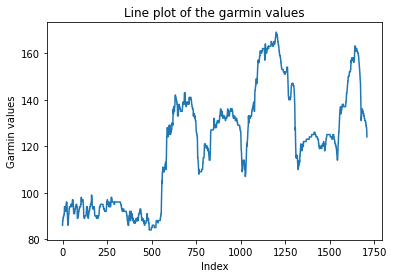

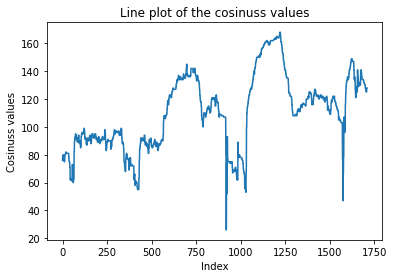

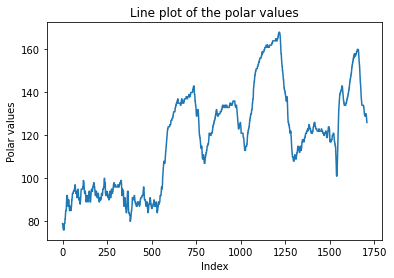

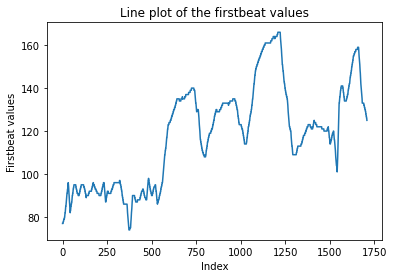

In [12]:
# My code
# Let's plot the values
plt.plot(garmin)
plt.xlabel('Index')
plt.ylabel('Garmin values')
plt.title('Line plot of the garmin values')
plt.show()

plt.plot(cosinuss)
plt.xlabel('Index')
plt.ylabel('Cosinuss values')
plt.title('Line plot of the cosinuss values')
plt.show()

plt.plot(polar)
plt.xlabel('Index')
plt.ylabel('Polar values')
plt.title('Line plot of the polar values')
plt.show()

plt.plot(firstbeat)
plt.xlabel('Index')
plt.ylabel('Firstbeat values')
plt.title('Line plot of the firstbeat values')
plt.show()


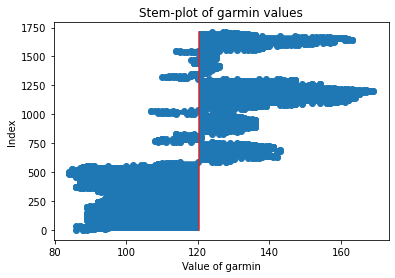

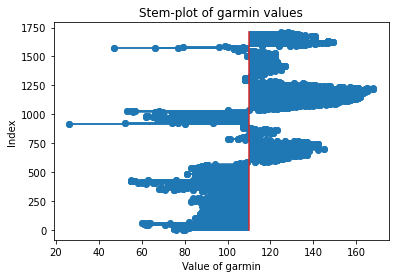

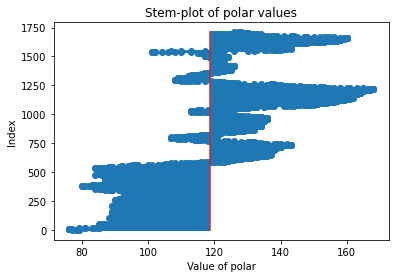

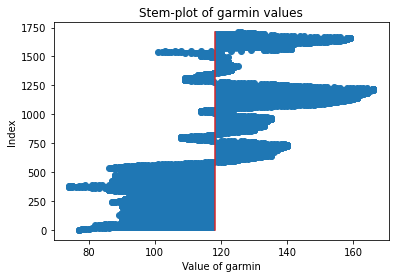

In [13]:
# My code
# Stem-plot
plt.stem(garmin, orientation = 'horizontal', bottom = 120.411111)
plt.title('Stem-plot of garmin values')
plt.xlabel('Value of garmin')
plt.ylabel('Index')
plt.show()

plt.stem(cosinuss, orientation = 'horizontal', bottom = 110.016374)
plt.title('Stem-plot of garmin values')
plt.xlabel('Value of garmin')
plt.ylabel('Index')
plt.show()

plt.stem(polar, orientation = 'horizontal', bottom = 118.685380)
plt.title('Stem-plot of polar values')
plt.xlabel('Value of polar')
plt.ylabel('Index')
plt.show()

plt.stem(firstbeat, orientation = 'horizontal', bottom = 118.097661)
plt.title('Stem-plot of garmin values')
plt.xlabel('Value of garmin')
plt.ylabel('Index')
plt.show()

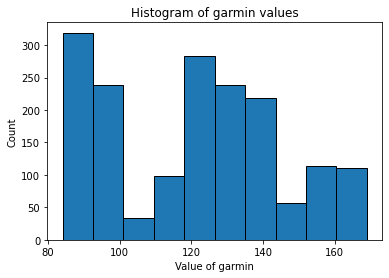

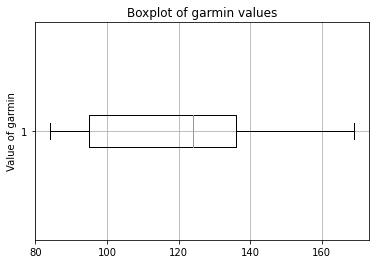

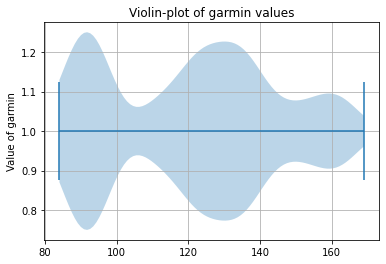

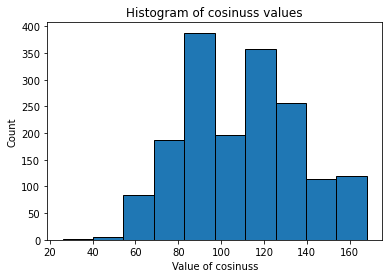

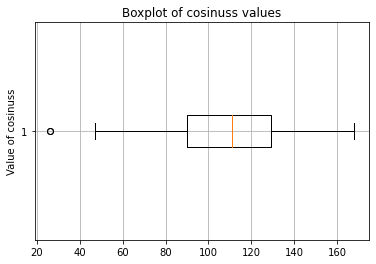

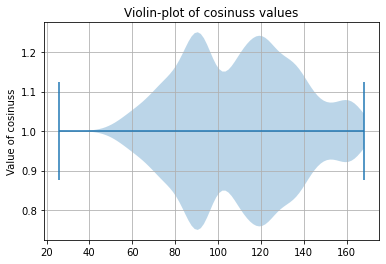

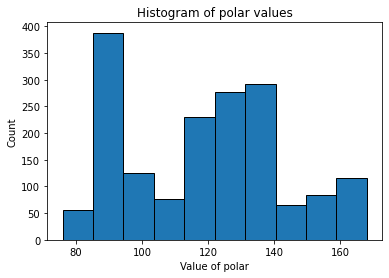

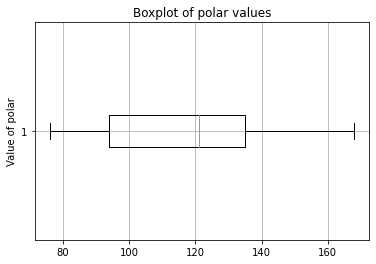

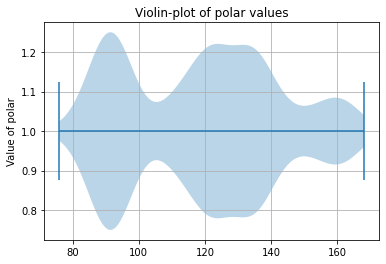

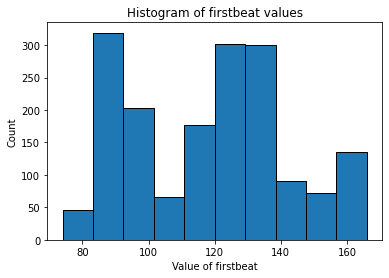

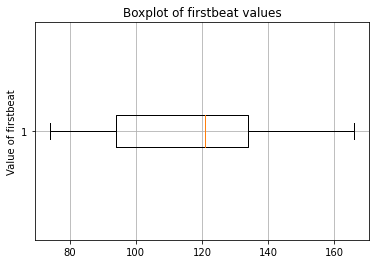

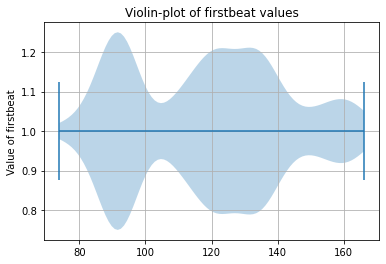

In [14]:
# My code
# Let's create histograms and box-plot and violin
plt.hist(garmin, bins = 10, edgecolor = 'black')
plt.xlabel('Value of garmin')
plt.ylabel('Count')
plt.title('Histogram of garmin values')
plt.show()
plt.boxplot(garmin, vert = False)
plt.title('Boxplot of garmin values')
plt.ylabel('Value of garmin')
plt.grid()
plt.show()
plt.violinplot(garmin, vert = False)
plt.title('Violin-plot of garmin values')
plt.ylabel('Value of garmin')
plt.grid()
plt.show()

plt.hist(cosinuss, bins = 10, edgecolor = 'black')
plt.xlabel('Value of cosinuss')
plt.ylabel('Count')
plt.title('Histogram of cosinuss values')
plt.show()
plt.boxplot(cosinuss, vert = False)
plt.title('Boxplot of cosinuss values')
plt.ylabel('Value of cosinuss')
plt.grid()
plt.show()
plt.violinplot(cosinuss, vert = False)
plt.title('Violin-plot of cosinuss values')
plt.ylabel('Value of cosinuss')
plt.grid()
plt.show()

plt.hist(polar, bins = 10, edgecolor = 'black')
plt.xlabel('Value of polar')
plt.ylabel('Count')
plt.title('Histogram of polar values')
plt.show()
plt.boxplot(polar, vert = False)
plt.title('Boxplot of polar values')
plt.ylabel('Value of polar')
plt.grid()
plt.show()
plt.violinplot(polar, vert = False)
plt.title('Violin-plot of polar values')
plt.ylabel('Value of polar')
plt.grid()
plt.show()

plt.hist(firstbeat, bins = 10, edgecolor = 'black')
plt.xlabel('Value of firstbeat')
plt.ylabel('Count')
plt.title('Histogram of firstbeat values')
plt.show()
plt.boxplot(firstbeat, vert = False)
plt.title('Boxplot of firstbeat values')
plt.ylabel('Value of firstbeat')
plt.grid()
plt.show()
plt.violinplot(firstbeat, vert = False)
plt.title('Violin-plot of firstbeat values')
plt.ylabel('Value of firstbeat')
plt.grid()
plt.show()

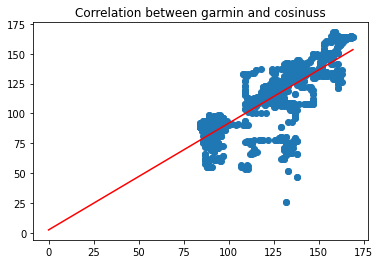

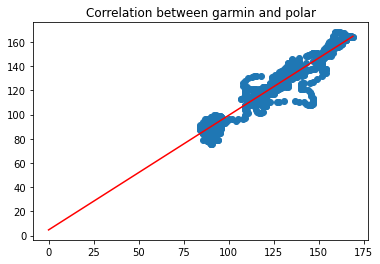

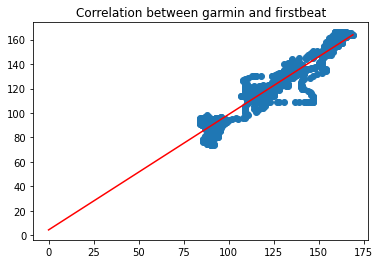

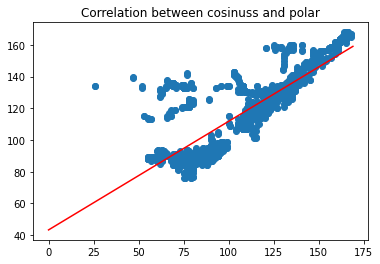

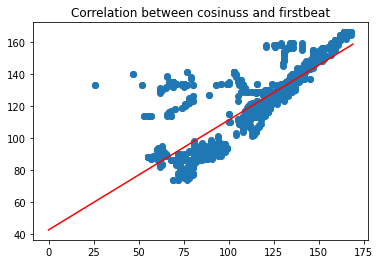

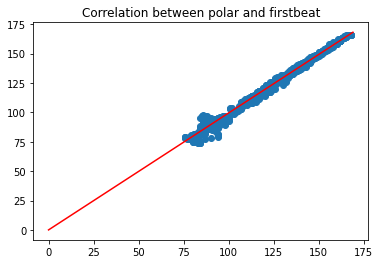

In [15]:
# My code
# Correlation and scatterplots: 
p = polyfit(garmin, cosinuss, 1) 
x1 = np.arange(0, 170)   
y1 = p[0] * x1 + p[1] 
plt.scatter(garmin, cosinuss)
plt.plot(x1, y1, 'r') 
plt.title('Correlation between garmin and cosinuss')
plt.show()

p = polyfit(garmin, polar, 1) 
x1 = np.arange(0, 170)   
y1 = p[0] * x1 + p[1] 
plt.scatter(garmin, polar)
plt.plot(x1, y1, 'r') 
plt.title('Correlation between garmin and polar')
plt.show()

p = polyfit(garmin, firstbeat, 1) 
x1 = np.arange(0, 170)   
y1 = p[0] * x1 + p[1] 
plt.scatter(garmin, firstbeat)
plt.plot(x1, y1, 'r') 
plt.title('Correlation between garmin and firstbeat')
plt.show()

p = polyfit(cosinuss, polar, 1) 
x1 = np.arange(0, 170)   
y1 = p[0] * x1 + p[1] 
plt.scatter(cosinuss, polar)
plt.plot(x1, y1, 'r') 
plt.title('Correlation between cosinuss and polar')
plt.show()

p = polyfit(cosinuss, firstbeat, 1) 
x1 = np.arange(0, 170)   
y1 = p[0] * x1 + p[1] 
plt.scatter(cosinuss, firstbeat)
plt.plot(x1, y1, 'r') 
plt.title('Correlation between cosinuss and firstbeat')
plt.show()

p = polyfit(polar, firstbeat, 1) 
x1 = np.arange(0, 170)   
y1 = p[0] * x1 + p[1] 
plt.scatter(polar, firstbeat)
plt.plot(x1, y1, 'r') 
plt.title('Correlation between polar and firstbeat')
plt.show()

**Explanation:**<br>
(1 -2) Most reliables: Polar and firstbeat
(3) Garmin
(4) Least reliable: Cosinuss
Based on the linear regression and the scatter plot of the polar and firstbeat, they are the two most reliable devices as not only are barely any outliers, but the data points are sided entirely on the linear regression line. The only values that shows slightly larger range of variety are the lower heart rate values (75-110). This fact is further confirmed by all other visualization method of the data, such as histograms, box-plots, etc. 

Based on the displayed informations, the least reliable is cosinuss as its measure values are most different from the rest of the devices.